<a href="https://colab.research.google.com/github/ZHANGZ1YUE/RainfallForecasting_ConvEncDec/blob/main/rainfall_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Rainfall Intensity based on Radar Data 
#Author: ZHANG Ziyue (Kyoto University)
#Date: 2011/12/6

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Research/30mins_4ch

Mounted at /content/drive/
/content/drive/MyDrive/Research/30mins_4ch


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.load('./input_30min_4ch.npy')
data = data[:,:,:,0]

In [ ]:
intensity = np.zeros((len(data)), dtype = "float32")
for i in range(len(data)):
  single_frame = 0
  for j in range(180):
    for k in range(120):                      #WHY DONT I JUST USE SUM  np.sum(data[0,:,:])
      single_frame = single_frame + data[i,j,k]
  intensity[i] = single_frame/180/120   #spatial average

#print(intensity)

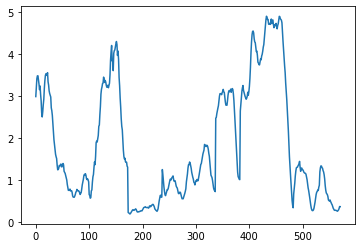

In [ ]:
plt.plot(intensity)

In [ ]:
array_2d = data[5,:,:]
array_1d = array_2d.flatten()

#array = array_1d[(array_1d < 15)]   # if i can remove the outliers
array = array_1d

plt.hist(array, bins = 20)

In [ ]:
#why glorot initializer does train, but he initializer does not?
np.random.seed(1)
w_he=np.random.randn(21600) * np.sqrt(2/21600)
w_glorot=np.random.randn(21600) * np.sqrt(2/(21600+21600))

In [ ]:
plt.hist(w_glorot)

In [ ]:
he = np.multiply(array, w_he)
glorot = np.multiply(array, w_glorot)

he1 = np.multiply(he, w_he)
glorot1 = np.multiply(glorot, w_glorot)
plt.hist(he, bins = 30)
plt.hist(glorot, bins = 30)

In [ ]:
w_he_=np.random.randn(9) * np.sqrt(2/9)
w_glorot_=np.random.randn(9) * np.sqrt(2/(9+9))

(array([2., 0., 4., 1., 0., 0., 0., 1., 0., 1.]),
 array([-0.12222265, -0.03084411,  0.06053444,  0.15191298,  0.24329152,
         0.33467006,  0.42604861,  0.51742715,  0.60880569,  0.70018423,
         0.79156278]),
 <a list of 10 Patch objects>)

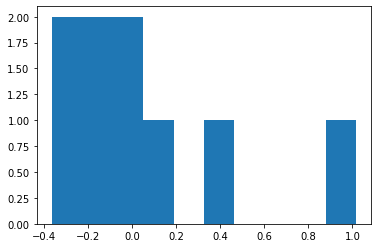

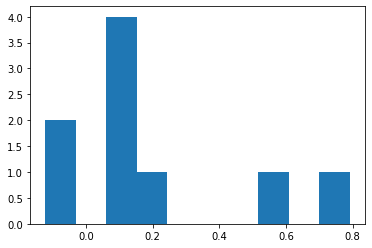

In [ ]:
plt.figure()
plt.hist(w_he_) #no work
plt.figure()
plt.hist(w_glorot_)